# **Data Centralizada**

En el presente cuadernillo se centralizará las diversas bases de datos usadas para el proyecto de análisis del nivel de prevención de sismos en los distritos del Perú. Las fuentes de base de datos son los siguientes:
* Base de Datos de ENAHO
* Base de Datos de establecimientos de salud
* Base de Datos de sismos
* Base de Datos de tipos de suelo
* Base de Datos de Proyectos ante ocurrencias de Desastres Naturales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

### Datos de Ubigeo

In [ ]:
filename = '/content/drive/MyDrive/Hackathon Girls 💅/Databases/TB_UBIGEOS.csv'
df_ubigeo = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
df_ubigeo = df_ubigeo[["ubigeo_inei","region","provincia","distrito","latitud","longitud"]].copy()
df_ubigeo.head()

,ubigeo_inei,region,provincia,distrito,latitud,longitud
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,-6.2294,-77.8728
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,-6.0325,-77.7108
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,-6.8358,-78.0197
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,-6.2556,-77.7008
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,-6.0783,-77.7375


## **Carga de Datos**

In [ ]:
# CARGA DE ENAHO
filename = '/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_ENAHO04-11.csv'
df_ENAHO0411 = pd.read_csv(filename)
filename = '/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_ENAHO12-22.csv'
df_ENAHO1222 = pd.read_csv(filename)
df_ENAHO1222.head()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,...,Nivel_propiedad_vivienda_7,Titulo_propiedad_1,Titulo_propiedad_2,Titulo_propiedad_3,Conteo_viviendas,ubigeo_inei,region,provincia,distrito,Key
0,2018,10202,7,7,0,0,0,24,0,0,...,0,0,18,0,36,10202,AMAZONAS,BAGUA,ARAMANGO,AMAZONASBAGUAARAMANGO2018
1,2018,10201,7,4,13,9,6,45,12,14,...,0,22,24,0,80,10201,AMAZONAS,BAGUA,BAGUA,AMAZONASBAGUABAGUA2018
2,2018,10203,7,6,2,3,0,21,2,0,...,0,5,13,1,31,10203,AMAZONAS,BAGUA,COPALLIN,AMAZONASBAGUACOPALLIN2018
3,2018,10205,7,7,1,0,0,36,1,0,...,0,1,42,0,57,10205,AMAZONAS,BAGUA,IMAZA,AMAZONASBAGUAIMAZA2018
4,2018,10206,7,6,2,4,0,17,1,1,...,0,6,8,0,25,10206,AMAZONAS,BAGUA,LA PECA,AMAZONASBAGUALA PECA2018


In [ ]:
df_ENAHO0411 = df_ENAHO0411.fillna(0)
df_ENAHO1222 = df_ENAHO1222.fillna(0)

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
def quitar_tildes(texto):
    return unidecode(texto)

In [ ]:
# CARGA DE SISMOS
filename = '/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/Sismos_completo.csv'
df_sismo = pd.read_csv(filename)
df_sismo = df_sismo.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
# Quitar tildes del Dataset de -Sismos-
df_sismo['key'] = df_sismo['key'].apply(quitar_tildes)
df_sismo.head()

,key,Conteo,Promedio,Min_Mag,Max_Mag
0,AREQUIPACAYLLOMACAYLLOMA2021,50,3.804000,3.4,5.5
1,TACNATARATATARATA2021,48,3.795833,3.2,5.0
2,AREQUIPACAYLLOMAMACA2020,34,3.458824,3.2,3.9
3,PIURASULLANAMIGUEL CHECA2021,32,3.940625,3.5,4.8
4,AREQUIPACAYLLOMAPINCHOLLO2020,30,3.506667,3.3,3.9


In [ ]:
# CARGA DE HOSPITALES
filename = '/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/Hospitales.csv'
df_hospitales = pd.read_csv(filename)
# Quitar tildes del Dataset de -Hospitales-
df_hospitales['key'] = df_hospitales['key'].str.replace(' ', '')
df_hospitales.head()

,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,key
0,5.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2004
1,10.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2005
2,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2006
3,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2007
4,13.0,3.0,3.0,0.0,AMAZONASBAGUAARAMANGO2008


In [ ]:
# CARGA DE PROYECTOS
filename = '/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/df_proyectoFondes.csv'
df_proyectos = pd.read_csv(filename)
df_proyectos.head()

,Key,Proyectos_inversion
0,ANCASHAIJAAIJA2017,3
1,ANCASHAIJACORIS2017,1
2,ANCASHAIJAHUACLLAN2017,1
3,ANCASHAIJALA MERCED2017,2
4,ANCASHAIJASUCCHA2017,1


In [ ]:
# CARGA DE SUELOS
filename = '/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos/suelo_nivel.csv'
df_suelos = pd.read_csv(filename)
df_suelos.drop(columns=['nombdep', 'nombprov', 'nombdist'],inplace=True)
df_suelos.head()

,ubigeo,ZONA
0,10101,2
1,10102,2
2,10103,2
3,10104,2
4,10105,2


## **Concatenación de Databases**

### **Datos del 2012 al 2022**
Para este caso se concatenarán todas las Base de datos.

In [ ]:
# Concatenar 2012 al 2022
# -> ENAHO Y SISMO
df_c1 = pd.merge(df_ENAHO1222, df_sismo, how="left", left_on=["Key"], right_on=["key"])
df_c1.drop(columns=["key"],inplace=True)
df_c1["Conteo"].fillna(0,inplace=True)
df_c1["Promedio"].fillna(0,inplace=True)
df_c1["Min_Mag"].fillna(0,inplace=True)
df_c1["Max_Mag"].fillna(0,inplace=True)

In [ ]:
# -> DF Y HOSPITALES
df_c2 = pd.merge(df_c1, df_hospitales, how="left", left_on=["Key"], right_on=["key"])
df_c2.drop(columns=["key"],inplace=True)
df_c2["Categoria_I-1"].fillna(0,inplace=True)
df_c2["Categoria_I-2"].fillna(0,inplace=True)
df_c2["Categoria_I-3"].fillna(0,inplace=True)
df_c2["Categoria_I-4"].fillna(0,inplace=True)

In [ ]:
# -> DF Y PROYECTOS
df_c3 = pd.merge(df_c2, df_proyectos, how="left", on=["Key"])

In [ ]:
# Se rellena con 0 los que son Null en las variables añadidas del DF_PROYECTOS debido a que de esta Base de Datos solo se tiene registro a partir del 2017
df_c3 = df_c3.fillna(0)

In [ ]:
# -> DF y SUELOS
df_c4 = pd.merge(df_c3, df_suelos, how="left", left_on=["UBIGEO"], right_on=["ubigeo"])
df_c4.drop(columns=["ubigeo"],inplace=True)

In [ ]:
df_c4.shape

(13344, 69)

In [ ]:
df2012_2022=df_c4.copy()

## **Renombrar columnas**

In [ ]:
df2012_2022 = df2012_2022.rename(columns={'Registro_SUNARP_1': 'Registro_SUNARP_SI',
                                          'Registro_SUNARP_2': 'Registro_SUNARP_NO',
                                          'Asistencia_Tecnica_1': 'Asistencia_Tecnica_SI',
                                          'Asistencia_Tecnica_2': 'Asistencia_Tecnica_NO',
                                          'Asistencia_Tecnica_3': 'Asistencia_Tecnica_NOSABE',
                                          'Licencia_1': 'Licencia_SI',
                                          'Licencia_2': 'Licencia_NO',
                                          'Licencia_3': 'Licencia_NOSABE',
                                          'Tipo_Vivienda_1': 'Tipo_casa_Independiente',
                                          'Tipo_Vivienda_2': 'Tipo_casa_Departamento',
                                          'Tipo_Vivienda_3': 'Tipo_casa_Quinta',
                                          'Tipo_Vivienda_4': 'Tipo_casa_Vecindad',
                                          'Tipo_Vivienda_5': 'Tipo_casa_Choza',
                                          'Tipo_Vivienda_6': 'Tipo_casa_Improvisada',
                                          'Tipo_Vivienda_7': 'Tipo_casa_No_habitable',
                                          'Tipo_Vivienda_8': 'Tipo_casa_Otro',
                                          'Pared_material_1': 'Pared_Ladrillo',
                                          'Pared_material_2': 'Pared_Piedra_sillar',
                                          'Pared_material_3': 'Pared_Adobe',
                                          'Pared_material_4': 'Pared_Tapia',
                                          'Pared_material_5': 'Pared_Quincha',
                                          'Pared_material_6': 'Pared_Piedra_barro',
                                          'Pared_material_7': 'Pared_Madera',
                                          'Pared_material_8': 'Pared_Tripley',
                                          'Pared_material_9': 'Pared_Otro',
                                          'Piso_material_1': 'Piso_MaderaPulida',
                                          'Piso_material_2': 'Piso_LaminasAsfalticas',
                                          'Piso_material_3': 'Piso_Losetas',
                                          'Piso_material_4': 'Piso_Madera',
                                          'Piso_material_5': 'Piso_Cemento',
                                          'Piso_material_6': 'Piso_Tierra',
                                          'Piso_material_7': 'Piso_Otro',
                                          'Techo_material_1': 'Techo_Concreto',
                                          'Techo_material_2': 'Techo_Madera',
                                          'Techo_material_3': 'Techo_Tejas',
                                          'Techo_material_4': 'Techo_Calamina',
                                          'Techo_material_5': 'Techo_Caña',
                                          'Techo_material_6': 'Techo_Triplay',
                                          'Techo_material_7': 'Techo_Paja',
                                          'Techo_material_8': 'Techo_Otro',
                                          'Nivel_propiedad_vivienda_1': 'Nivel_Casa_Alquilada',
                                          'Nivel_propiedad_vivienda_2': 'Nivel_Casa_PropiaPagada',
                                          'Nivel_propiedad_vivienda_3': 'Nivel_Casa_PropiaInvasion',
                                          'Nivel_propiedad_vivienda_4': 'Nivel_Casa_PropiaCredito',
                                          'Nivel_propiedad_vivienda_5': 'Nivel_Casa_CedidaTrabajo',
                                          'Nivel_propiedad_vivienda_6': 'Nivel_Casa_CedidaInstitución',
                                          'Nivel_propiedad_vivienda_7': 'Nivel_Casa_Otro',
                                          'Titulo_propiedad_1': 'Titulo_propiedad_SI',
                                          'Titulo_propiedad_2': 'Titulo_propiedad_NO',
                                          'Titulo_propiedad_3': 'Titulo_propiedad_Tramite',
                                          'Conteo': 'Conteo_sismos',})

# **CLUSTERING**
Se extrae un año de muestra para poder probar el clutering para el nivel de prevención ante sismos de los distritos tomados. Las consideraciones son:
* Debe ser un año mayor o igual al 2017, debido a que es aprtir de este año en el cual tenemos información para todas las bases de datos
* Debe ser el año cuando ocurrió más sismos, pues se puede observar de mejor manera la frecuencia de sismos en ciertas zonas recurrentes.

## **Clustering 2012_2022**

In [ ]:
clust = df2012_2022.copy()

In [ ]:
clust.shape

(13344, 69)

In [ ]:
# Columnas Object
columnas_object = clust.select_dtypes(include=['object'])
columnas_object.head()

,region,provincia,distrito,Key
0,AMAZONAS,BAGUA,ARAMANGO,AMAZONASBAGUAARAMANGO2018
1,AMAZONAS,BAGUA,BAGUA,AMAZONASBAGUABAGUA2018
2,AMAZONAS,BAGUA,COPALLIN,AMAZONASBAGUACOPALLIN2018
3,AMAZONAS,BAGUA,IMAZA,AMAZONASBAGUAIMAZA2018
4,AMAZONAS,BAGUA,LA PECA,AMAZONASBAGUALA PECA2018


In [ ]:
columnas_object

,region,provincia,distrito,Key
0,AMAZONAS,BAGUA,ARAMANGO,AMAZONASBAGUAARAMANGO2018
1,AMAZONAS,BAGUA,BAGUA,AMAZONASBAGUABAGUA2018
2,AMAZONAS,BAGUA,COPALLIN,AMAZONASBAGUACOPALLIN2018
3,AMAZONAS,BAGUA,IMAZA,AMAZONASBAGUAIMAZA2018
4,AMAZONAS,BAGUA,LA PECA,AMAZONASBAGUALA PECA2018
...,...,...,...,...
13339,UCAYALI,CORONEL PORTILLO,YARINACOCHA,UCAYALICORONEL PORTILLOYARINACOCHA2012
13340,UCAYALI,PADRE ABAD,CURIMANA,UCAYALIPADRE ABADCURIMANA2012
13341,UCAYALI,PADRE ABAD,IRAZOLA,UCAYALIPADRE ABADIRAZOLA2012
13342,UCAYALI,PADRE ABAD,PADRE ABAD,UCAYALIPADRE ABADPADRE ABAD2012


In [ ]:
# Transformamos la variable "Key" en Indice
clust = clust.set_index('Key')
clust.head()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,...,Conteo_sismos,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA
Key,,,,,,,,,,,,,,,,,,,,,
AMAZONASBAGUAARAMANGO2018,2018,10202,7,7,0,0,0,24,0,0,...,0.0,0.0,0.0,0.0,13.0,3.0,3.0,0.0,0.0,2.0
AMAZONASBAGUABAGUA2018,2018,10201,7,4,13,9,6,45,12,14,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,2.0
AMAZONASBAGUACOPALLIN2018,2018,10203,7,6,2,3,0,21,2,0,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0
AMAZONASBAGUAIMAZA2018,2018,10205,7,7,1,0,0,36,1,0,...,1.0,4.9,4.9,4.9,29.0,5.0,5.0,0.0,0.0,2.0
AMAZONASBAGUALA PECA2018,2018,10206,7,6,2,4,0,17,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
clust_backup = clust.copy()

In [ ]:
# Seleccionar solo las variables cuantitativas
clust = clust.select_dtypes(include=['int64', 'float64'])
clust = clust.drop(columns=['YEAR','UBIGEO'])
clust.head()

,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,Licencia_NO,Licencia_NOSABE,...,Conteo_sismos,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA
Key,,,,,,,,,,,,,,,,,,,,,
AMAZONASBAGUAARAMANGO2018,7,7,0,0,0,24,0,0,24,0,...,0.0,0.0,0.0,0.0,13.0,3.0,3.0,0.0,0.0,2.0
AMAZONASBAGUABAGUA2018,7,4,13,9,6,45,12,14,38,11,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,2.0
AMAZONASBAGUACOPALLIN2018,7,6,2,3,0,21,2,0,21,2,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0
AMAZONASBAGUAIMAZA2018,7,7,1,0,0,36,1,0,36,1,...,1.0,4.9,4.9,4.9,29.0,5.0,5.0,0.0,0.0,2.0
AMAZONASBAGUALA PECA2018,7,6,2,4,0,17,1,1,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


## **KMeans**

In [ ]:
# Importa librerias para clustering
from sklearn.cluster import KMeans   # libreria de k-means

In [ ]:
dfTOT = df2012_2022.copy()

### **Estandarización de los Datos**

In [ ]:
# muestra una descripcion del dataset
clust.describe()

,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,Licencia_NO,Licencia_NOSABE,...,Conteo_sismos,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA
count,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,...,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13343.000000
mean,4.925060,5.875000,7.942371,1.307629,3.916742,18.548186,2.509592,5.190872,17.169889,2.613759,...,0.265588,0.474677,0.464194,0.489448,1.511316,0.675884,0.389239,0.116457,0.466951,2.827250
std,1.887789,1.775015,20.800067,2.948866,13.038176,25.373612,7.425075,15.115362,23.223627,7.412349,...,1.324815,1.396032,1.365985,1.441899,3.261152,1.496334,0.867368,0.338296,1.457469,0.820167
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,5.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.000000,6.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,6.000000,7.000000,6.000000,2.000000,2.000000,20.000000,2.000000,3.000000,19.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000
max,8.000000,8.000000,264.000000,75.000000,202.000000,357.000000,126.000000,211.000000,348.000000,123.000000,...,50.000000,7.200000,7.200000,7.600000,40.000000,23.000000,8.000000,3.000000,20.000000,4.000000


In [ ]:
clust.isnull().sum()

DOMINIO                  0
ESTRATO                  0
Registro_SUNARP_SI       0
Registro_SUNARP_NO       0
Asistencia_Tecnica_SI    0
                        ..
Categoria_I-2            0
Categoria_I-3            0
Categoria_I-4            0
Proyectos_inversion      0
ZONA                     1
Length: 63, dtype: int64

In [ ]:
clust[clust['ZONA'].isnull()==True]

,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,Licencia_NO,Licencia_NOSABE,...,Conteo_sismos,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA
Key,,,,,,,,,,,,,,,,,,,,,
LORETOMAYNASPUTUMAYO2012,7,7,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


El ubigeo corresponge a la siguiente ubicación:
- Región: Loreto
- Provincia: Maynas
- Distrito: Putumayo

Al ubicarlo en el mapa, se obtiene que la zona es la 1. Se reemplaza con la zona 1.

In [ ]:
clust.fillna(1,inplace=True)
dfTOT.fillna(1,inplace=True)

In [ ]:
# importa libreria StandardScaler
from sklearn.preprocessing import StandardScaler

# estandariza las columnas de df_customers con StandardScaler. El resultado es un numpy array
X_standardized = StandardScaler().fit_transform(clust)

# convierte el array de datos estandarizados a un DataFrame
clust_std = pd.DataFrame(X_standardized, columns=clust.columns)
clust_std.describe()  # muestra descripcion de los datos estandarizados

,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,Licencia_NO,Licencia_NOSABE,...,Conteo_sismos,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA
count,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,...,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04,1.334400e+04
mean,1.267305e-16,-2.129924e-18,-1.703939e-17,-2.981894e-17,-4.259849e-18,2.981894e-17,4.685833e-17,3.088390e-17,-7.454735e-17,2.981894e-17,...,-1.277955e-17,-8.306705e-17,6.176780e-17,2.662405e-17,4.259849e-18,-6.656013e-17,-2.449413e-17,5.857292e-18,-5.963788e-17,-1.448349e-16
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,...,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-2.079262e+00,-2.746559e+00,-3.818578e-01,-4.434511e-01,-3.004169e-01,-7.310304e-01,-3.380015e-01,-3.434299e-01,-7.393562e-01,-3.526354e-01,...,-2.004789e-01,-3.400312e-01,-3.398362e-01,-3.394599e-01,-4.634475e-01,-4.517103e-01,-4.487753e-01,-3.442586e-01,-3.203971e-01,-2.227486e+00
25%,-4.900414e-01,-4.929721e-01,-3.818578e-01,-4.434511e-01,-3.004169e-01,-4.551429e-01,-3.380015e-01,-3.434299e-01,-4.379277e-01,-3.526354e-01,...,-2.004789e-01,-3.400312e-01,-3.398362e-01,-3.394599e-01,-4.634475e-01,-4.517103e-01,-4.487753e-01,-3.442586e-01,-3.203971e-01,-1.008358e+00
50%,3.969875e-02,7.042458e-02,-3.337793e-01,-4.434511e-01,-3.004169e-01,-3.369054e-01,-3.380015e-01,-3.434299e-01,-3.518053e-01,-3.526354e-01,...,-2.004789e-01,-3.400312e-01,-3.398362e-01,-3.394599e-01,-4.634475e-01,-4.517103e-01,-4.487753e-01,-3.442586e-01,-3.203971e-01,2.107711e-01
75%,5.694389e-01,6.338212e-01,-9.338642e-02,2.348011e-01,-1.470155e-01,5.721960e-02,-6.863384e-02,-1.449489e-01,7.880679e-02,-8.280533e-02,...,-2.004789e-01,-3.400312e-01,-3.398362e-01,-3.394599e-01,1.498558e-01,2.166146e-01,7.041815e-01,-3.442586e-01,-3.203971e-01,2.107711e-01
max,1.628919e+00,1.197218e+00,1.231088e+01,2.499101e+01,1.519313e+01,1.333923e+01,1.663216e+01,1.361640e+01,1.424594e+01,1.624192e+01,...,3.754206e+01,4.817635e+00,4.931284e+00,4.931566e+00,1.180262e+01,1.491976e+01,8.774879e+00,8.524055e+00,1.340253e+01,1.429900e+00


In [ ]:
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i, random_state = 0) for i in Nc] # random_state: consigue cierta repetición en los resultados
kmeans
score = [kmeans[i].fit(clust_std).score(clust_std) for i in range(len(kmeans))]
score

[-840672.0000000005,
 -664612.3333364072,
 -606029.6370450591,
 -565398.503444582,
 -545737.8246254475,
 -525177.9592370805,
 -506718.45229499426,
 -489416.65648524836,
 -474965.77889689,
 -466848.5717356386]

In [ ]:
# Importa librerias necesarias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)   # setea para que solo se impriman 2 decimales
import warnings
warnings.filterwarnings("ignore")

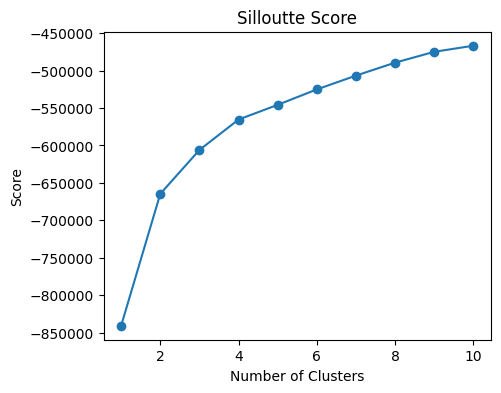

In [ ]:
# Figura de la Silueta
plt.figure(figsize=(5, 4))
plt.plot(Nc,score,marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silloutte Score')
plt.show()

In [ ]:
# Configura un clusterizador kmeans con inicializacion "k-means++",  3 clusters  y 12 ejecuciones
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12, random_state = 42)

# Ejecuta K-means en la data estandarizada
k_means.fit(clust)
print("Inercia: ", k_means.inertia_)
print("Score: ",k_means.score(clust))

Inercia:  6396479954619.878
Score:  -6396479954619.877


In [ ]:
# recupera las etiquetas que  asignó k-means  a cada dato
k_means_labels = k_means.labels_

In [ ]:
# obtiene los centros de los clusters que encontro k-means
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[5.03e+00, 5.96e+00, 1.08e+01, 2.06e+00, 4.43e+00, 2.51e+01,
        3.09e+00, 5.97e+00, 2.34e+01, 3.29e+00, 3.24e+01, 4.98e-01,
        1.51e-01, 1.21e+00, 8.09e-01, 2.09e-02, 1.99e-03, 3.32e-04,
        1.68e+01, 9.03e-02, 6.38e+00, 1.45e+00, 1.51e+00, 3.06e-01,
        6.19e+00, 4.95e-01, 3.45e-01, 1.63e+00, 2.57e+00, 3.87e+00,
        1.61e+01, 1.03e+01, 1.84e-01, 8.14e+00, 3.08e-01, 6.61e-01,
        2.42e+01, 2.30e-01, 6.94e-02, 1.34e+00, 8.37e-02, 2.43e+00,
        2.56e+01, 2.46e+00, 1.06e-01, 3.65e-01, 4.41e+00, 2.49e-02,
        1.29e+01, 1.32e+01, 7.23e-01, 4.70e+01, 2.10e+05, 5.09e-01,
        7.61e-01, 7.41e-01, 7.91e-01, 1.30e+00, 7.46e-01, 3.55e-01,
        1.43e-01, 5.79e-01, 2.81e+00],
       [5.24e+00, 6.19e+00, 5.18e+00, 1.07e+00, 2.12e+00, 1.56e+01,
        1.66e+00, 3.24e+00, 1.44e+01, 1.74e+00, 1.88e+01, 5.50e-01,
        1.87e-01, 9.20e-01, 2.59e-01, 1.07e-02, 1.17e-03, 1.17e-03,
        7.19e+00, 2.43e-01, 9.19e+00, 1.68e+00, 1.68e-01, 3.85e-01,
        1

In [ ]:
# adiciona una columna 'cluster_std' con las etiquetas de grupos que asignó kmeans a la DATA ESTANDARIZADA
clust_std['cluster_std'] = k_means_labels
clust_std.head(5)

,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,Licencia_NO,Licencia_NOSABE,...,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA,cluster_std
0,1.099179,0.633821,-0.381858,-0.443451,-0.300417,0.214870,-0.338001,-0.343430,0.294113,-0.352635,...,-0.340031,-0.339836,-0.339460,3.523023,1.553264,3.010095,-0.344259,-0.320397,-1.008358,1
1,1.099179,-1.056369,0.243164,2.608684,0.159787,1.042532,1.278204,0.582815,0.896970,1.131430,...,-0.340031,-0.339836,-0.339460,1.683114,-0.451710,1.857138,-0.344259,-0.320397,-1.008358,1
2,1.099179,0.070425,-0.285701,0.573927,-0.300417,0.096632,-0.068634,-0.343430,0.164929,-0.082805,...,-0.340031,-0.339836,-0.339460,0.763159,0.216615,0.704182,-0.344259,-0.320397,-1.008358,1
3,1.099179,0.633821,-0.333779,-0.443451,-0.300417,0.687820,-0.203318,-0.343430,0.810847,-0.217720,...,3.170047,3.247454,3.058965,8.429449,2.889914,5.316009,-0.344259,-0.320397,-1.008358,1
4,1.099179,0.070425,-0.285701,0.913053,-0.300417,-0.061018,-0.203318,-0.277270,-0.007316,-0.352635,...,-0.340031,-0.339836,-0.339460,-0.463447,-0.451710,-0.448775,-0.344259,-0.320397,-1.008358,1


### **Asignación de Cluster a los Datos originales**

In [ ]:
# adiciona una columna 'cluster_std' con las etiquetas de grupos que asignó kmeans a la DATA ORIGINAL
dfTOT['cluster_std']=k_means_labels
dfTOT = pd.merge(dfTOT, df_ubigeo[["ubigeo_inei","latitud","longitud"]], how="left", left_on=["ubigeo_inei"], right_on=["ubigeo_inei"])
dfTOT.head()
dfTOT['cluster_std'] = k_means_labels
dfTOT.head(5)

,YEAR,UBIGEO,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,...,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA,cluster_std,latitud,longitud
0,2018,10202,7,7,0,0,0,24,0,0,...,0.0,13.0,3.0,3.0,0.0,0.0,2.0,1,-5.4164,-78.4378
1,2018,10201,7,4,13,9,6,45,12,14,...,0.0,7.0,0.0,2.0,0.0,0.0,2.0,1,-5.6389,-78.5311
2,2018,10203,7,6,2,3,0,21,2,0,...,0.0,4.0,1.0,1.0,0.0,0.0,2.0,1,-5.6750,-78.4231
3,2018,10205,7,7,1,0,0,36,1,0,...,4.9,29.0,5.0,5.0,0.0,0.0,2.0,1,-5.1636,-78.2889
4,2018,10206,7,6,2,4,0,17,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,-5.6119,-78.4369


In [ ]:
# Eliminar un UBIGEO, en este caso ubigeo_inei
dfTOT.drop(columns=["ubigeo_inei"],inplace=True)

In [ ]:
dfTOT["cluster_std"].unique()

array([1, 2, 0], dtype=int32)

In [ ]:
dfTOT["cluster_std"].value_counts()

2    5186
1    5146
0    3012
Name: cluster_std, dtype: int64

In [ ]:
dfTOT.shape

(13344, 71)

In [ ]:
# Guardar los datos con el cluster asignado
dfTOT.to_csv('data_clust.csv')

## **Gráfico de clúster (2018)**

In [ ]:
dfTOT['YEAR'].value_counts()

2018    1315
2017    1261
2019    1258
2021    1255
2016    1255
2022    1253
2020    1216
2015    1215
2014    1160
2013    1124
2012    1032
Name: YEAR, dtype: int64

In [ ]:
df2018=dfTOT[dfTOT['YEAR']==2018]

In [ ]:
# instalacion de libreria geopandas y dependencias
!pip install geopandas fiona shapely pyproj rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 6.4 MB/s eta 0:00:00


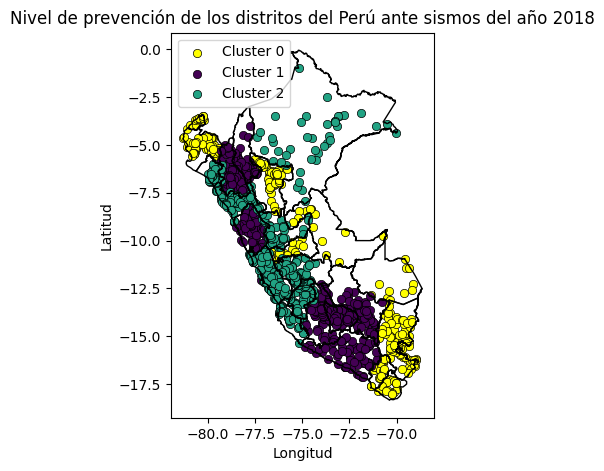

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear un GeoDataFrame a partir de los datos de latitud, longitud y cluster_std
gdf = gpd.GeoDataFrame(df2018, geometry=gpd.points_from_xy(df2018['longitud'], df2018['latitud']))

# Cargar los límites de Perú
peru_boundaries = gpd.read_file('peru_shapes/per_admbnda_adm1_ign_20200714.shp')

# Definir colores para cada valor de cluster_std
colors = {0: 'yellow', 1: '#440154FF', 2: '#22A384FF'}  # Ajusta los colores según tus preferencias

# Crear un mapa de dispersión de los datos geoespaciales con colores codificados por cluster_std
plt.figure(figsize=(10, 5))

# Iterar sobre los valores únicos de cluster_std y plotear puntos con colores específicos
for cluster_value, color in colors.items():
    subset = gdf[gdf['cluster_std'] == cluster_value]
    plt.scatter(subset.geometry.x, subset.geometry.y, color=color, label=f'Cluster {cluster_value}', marker='o', edgecolors='black', linewidths=0.5)

# Agregar límites de país (en este caso, Perú)
# peru.boundary.plot(ax=plt.gca(), linewidth=2, color='black')

# Agregar límites de distritos
peru_boundaries.boundary.plot(ax=plt.gca(), linewidth=1, color='black')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Nivel de prevención de los distritos del Perú ante sismos del año 2018')
plt.legend()
plt.show()


## **Centroides del clúster**

In [ ]:
df_centroides = dfTOT.copy()
df_centroides.drop(columns=["YEAR","UBIGEO","latitud","longitud"],inplace=True)
grupoCluster = df_centroides.groupby("cluster_std").mean()
grupoCluster.T.head(35)

cluster_std,0,1,2
DOMINIO,5.026892,5.244073,4.549364
ESTRATO,5.957171,6.186941,5.517740
Registro_SUNARP_SI,10.788513,5.177225,9.033166
Registro_SUNARP_NO,2.064409,1.073649,1.100270
Asistencia_Tecnica_SI,4.434595,2.116401,5.402430
Asistencia_Tecnica_NO,25.097942,15.583171,17.686271
Asistencia_Tecnica_NOSABE,3.088313,1.660707,3.015812
Licencia_SI,5.965471,3.243296,6.673544
Licencia_NO,23.365870,14.373688,16.345931
Licencia_NOSABE,3.289509,1.743296,3.085037


In [ ]:
grupoCluster.T.iloc[35:,:]

cluster_std,0,1,2
Techo_Tejas,0.660691,3.823358,2.176822
Techo_Calamina,24.249668,9.743879,10.791554
Techo_Caña,0.229748,0.260785,2.205168
Techo_Triplay,0.069389,0.197435,0.284998
Techo_Paja,1.337649,0.648659,0.965677
Techo_Otro,0.083665,0.066654,0.145006
Nivel_Casa_Alquilada,2.428619,1.490284,2.567297
Nivel_Casa_PropiaPagada,25.622178,15.797513,20.078673
Nivel_Casa_PropiaInvasion,2.463147,0.508745,1.151369
Nivel_Casa_PropiaCredito,0.105578,0.056743,0.211338


# **INGENIERÍA DE ATRIBUTOS**

In [ ]:
df_atributos = df_centroides.drop(['region',"provincia","distrito","Key"], axis=1)
df_atributos.head()

,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,Licencia_NO,Licencia_NOSABE,...,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA,cluster_std
0,7,7,0,0,0,24,0,0,24,0,...,0.0,0.0,0.0,13.0,3.0,3.0,0.0,0.0,2.0,1
1,7,4,13,9,6,45,12,14,38,11,...,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,2.0,1
2,7,6,2,3,0,21,2,0,21,2,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,1
3,7,7,1,0,0,36,1,0,36,1,...,4.9,4.9,4.9,29.0,5.0,5.0,0.0,0.0,2.0,1
4,7,6,2,4,0,17,1,1,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1


In [ ]:
# Separamos los atributos del Target
X = df_atributos.drop(['cluster_std'], axis=1) #atributos
y = df_atributos['cluster_std'] # Target

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

## **Selección de atributos**

### **Con Filtros**

In [ ]:
# ->> CON F_CLASSIF

# selecciona 3 atributos con F_CLASSIF
fit_selector = SelectKBest(score_func=f_classif, k=10).fit(X, y)

# muestra resultados de seleccion
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Scores de Atributos: {}".format(fit_selector.scores_))

# obtiene la data reducida (solo atributos seleccionados)
X_filtered_fclassif = fit_selector.transform(X)
print(X_filtered_fclassif)

Atributos Seleccionados: [ 0  1 21 22 24 29 35 36 37 61]
Scores de Atributos: [185.55 193.14  81.78 130.7   86.19 141.39  55.28  72.39 151.09  58.99
 125.51  95.19  18.34  16.43  52.5    9.92   1.56   0.48 100.59  60.35
 148.22 207.16 194.39  61.47 179.39  51.71  88.57  40.02  54.72 189.42
 119.21 118.73  28.    59.02   7.33 360.63 471.85 450.12  32.6   50.32
  30.03  48.03 119.55 119.39  64.85  45.75  75.67   0.74  90.07 157.85
  67.91 118.51  68.53  94.12  92.2   96.96  98.64  28.23  48.94 137.05
  15.43 327.87]
[[ 7.  7.  4. ... 22.  1.  2.]
 [ 7.  4.  0. ... 48.  0.  2.]
 [ 7.  6.  0. ... 19.  0.  2.]
 ...
 [ 7.  6.  0. ... 30.  0.  2.]
 [ 7.  6.  0. ... 45.  0.  2.]
 [ 7.  6.  0. ... 16.  0.  1.]]


In [ ]:
# 5. Pasamos el array de los ATRIBUTOS SELECCIONADOS y TARGET a un Dataframe

# 5.1 Obtenemos el nombre de las columnas seleccionadas
columnasX = []
for col in fit_selector.get_support(indices=True):
  columnasX.append(X.columns[col])
columnasX

# 5.2 Insertamos los X seleccionados
Data_fclass= pd.DataFrame(X_filtered_fclassif, columns = columnasX)
# 5.3 Insertamos el target Y
Data_fclass['cluster_std'] = y

Data_fclass.head()

,DOMINIO,ESTRATO,Pared_Tapia,Pared_Quincha,Pared_Madera,Piso_Madera,Techo_Tejas,Techo_Calamina,Techo_Caña,ZONA,cluster_std
0,7.0,7.0,4.0,0.0,8.0,5.0,0.0,22.0,1.0,2.0,1
1,7.0,4.0,0.0,1.0,1.0,0.0,0.0,48.0,0.0,2.0,1
2,7.0,6.0,0.0,0.0,1.0,1.0,0.0,19.0,0.0,2.0,1
3,7.0,7.0,0.0,0.0,31.0,4.0,0.0,34.0,0.0,2.0,1
4,7.0,6.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,2.0,1


In [ ]:
# ->> CON CHI2

# selecciona 3 atributos con CHI2
fit_selector = SelectKBest(score_func=chi2, k=10).fit(X, y) # Te selecciona por estadística las mejores variables

# muestra resultados de seleccion
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Scores de Atributos: {}".format(fit_selector.scores_))

# obtiene la data reducida (solo atributos seleccionados)
X_filtered_chi2 = fit_selector.transform(X)
print(X_filtered_chi2)

Atributos Seleccionados: [ 5 10 18 24 30 33 36 37 48 51]
Scores de Atributos: [2.61e+02 2.01e+02 8.80e+03 1.71e+03 7.39e+03 9.61e+03 2.41e+03 6.30e+03
 9.28e+03 2.46e+03 1.47e+04 5.74e+03 3.37e+02 4.93e+02 1.23e+03 6.19e+01
 3.12e+00 2.09e+00 1.81e+04 5.41e+02 3.87e+03 5.24e+03 8.58e+03 5.93e+02
 1.57e+04 7.00e+02 3.75e+03 1.78e+03 3.93e+03 6.27e+03 1.29e+04 2.06e+03
 3.25e+02 9.57e+03 1.93e+02 7.99e+03 3.42e+04 1.20e+04 4.38e+02 9.86e+02
 1.69e+02 1.59e+03 9.39e+03 6.07e+03 4.98e+02 1.12e+03 2.12e+03 2.62e+00
 9.67e+03 3.88e+03 5.93e+02 2.20e+04 8.97e+02 7.62e+02 7.31e+02 8.12e+02
 1.37e+03 1.86e+02 1.88e+02 2.64e+02 1.40e+02 1.49e+02]
[[24. 24.  2. ...  1.  0. 36.]
 [45. 61. 29. ...  0. 22. 80.]
 [21. 23.  7. ...  0.  5. 31.]
 ...
 [33. 34.  5. ...  0. 12. 60.]
 [54. 58. 26. ...  0. 30. 89.]
 [14. 16.  0. ...  0.  1. 19.]]


In [ ]:
# 5. Pasamos el array de los ATRIBUTOS SELECCIONADOS y TARGET a un Dataframe

# 5.1 Obtenemos el nombre de las columnas seleccionadas
columnasX = []
for col in fit_selector.get_support(indices=True):
  columnasX.append(X.columns[col])
columnasX

# 5.2 Insertamos los X seleccionados
Data_chi= pd.DataFrame(X_filtered_chi2, columns = columnasX)
# 5.3 Insertamos el target Y
Data_chi['cluster_std'] = y

Data_chi.head()

,Asistencia_Tecnica_NO,Tipo_casa_Independiente,Pared_Ladrillo,Pared_Madera,Piso_Cemento,Techo_Concreto,Techo_Calamina,Techo_Caña,Titulo_propiedad_SI,Conteo_viviendas,cluster_std
0,24.0,24.0,2.0,8.0,6.0,1.0,22.0,1.0,0.0,36.0,1
1,45.0,61.0,29.0,1.0,37.0,15.0,48.0,0.0,22.0,80.0,1
2,21.0,23.0,7.0,1.0,13.0,5.0,19.0,0.0,5.0,31.0,1
3,36.0,37.0,2.0,31.0,3.0,1.0,34.0,0.0,1.0,57.0,1
4,17.0,16.0,1.0,0.0,10.0,0.0,18.0,0.0,6.0,25.0,1


### **Con Embedding**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from numpy.random import seed # semilla para generar numeros pseudoaleatorios
from numpy.random import rand
seed(1)

In [ ]:
# 4. Obtiene el ranking de los atributos
modelo = RandomForestClassifier()
modelo.fit(X, y)
importance = modelo.feature_importances_

# 5. Imprimir el ranking de los atributos
for i,j in enumerate(importance):
  print('Feature: %0d, Score: %.2f' % (i,j))

# 6. Imprimir los k mejores atributos
import heapq

def k_mayores(lista, k):
    k_mayores_elementos = heapq.nlargest(k, enumerate(lista), key=lambda x: x[1])
    return [i for i, _ in k_mayores_elementos]

posiciones_k_mayores = k_mayores(importance, 10)
print("Atributos seleccionados: ", posiciones_k_mayores)

Feature: 0, Score: 0.12
Feature: 1, Score: 0.03
Feature: 2, Score: 0.02
Feature: 3, Score: 0.01
Feature: 4, Score: 0.01
Feature: 5, Score: 0.02
Feature: 6, Score: 0.01
Feature: 7, Score: 0.01
Feature: 8, Score: 0.02
Feature: 9, Score: 0.01
Feature: 10, Score: 0.02
Feature: 11, Score: 0.00
Feature: 12, Score: 0.00
Feature: 13, Score: 0.01
Feature: 14, Score: 0.01
Feature: 15, Score: 0.00
Feature: 16, Score: 0.00
Feature: 17, Score: 0.00
Feature: 18, Score: 0.02
Feature: 19, Score: 0.01
Feature: 20, Score: 0.06
Feature: 21, Score: 0.04
Feature: 22, Score: 0.02
Feature: 23, Score: 0.01
Feature: 24, Score: 0.02
Feature: 25, Score: 0.00
Feature: 26, Score: 0.00
Feature: 27, Score: 0.00
Feature: 28, Score: 0.01
Feature: 29, Score: 0.03
Feature: 30, Score: 0.02
Feature: 31, Score: 0.03
Feature: 32, Score: 0.00
Feature: 33, Score: 0.02
Feature: 34, Score: 0.01
Feature: 35, Score: 0.05
Feature: 36, Score: 0.04
Feature: 37, Score: 0.03
Feature: 38, Score: 0.00
Feature: 39, Score: 0.02
Feature: 4

In [ ]:
# 7. Pasamos el array de los ATRIBUTOS SELECCIONADOS y TARGET a un Dataframe

# 7.1 Obtenemos el nombre de las columnas seleccionadas
columnasX = []
for col in posiciones_k_mayores:
  columnasX.append(X.columns[col])

Data_embedding = X[columnasX]

# 7.2 Insertamos los X seleccionados
Data_Selected = pd.DataFrame(Data_embedding, columns = columnasX)
# 7.3 Insertamos el target Y
Data_Selected['cluster_std'] = y

Data_Selected

,DOMINIO,Pared_Adobe,Techo_Tejas,ZONA,Techo_Calamina,Pared_Tapia,Categoria_I-1,Piso_Tierra,Piso_Madera,Conteo_viviendas,cluster_std
0,7,10,0,2.0,22,4,13.0,13,5,36,1
1,7,31,0,2.0,48,0,7.0,18,0,80,1
2,7,12,0,2.0,19,0,4.0,10,1,31,1
3,7,1,0,2.0,34,0,29.0,38,4,57,1
4,7,16,0,2.0,18,0,0.0,8,0,25,1
...,...,...,...,...,...,...,...,...,...,...,...
13339,7,1,4,2.0,140,0,0.0,45,42,206,0
13340,7,0,0,2.0,5,0,0.0,0,5,11,0
13341,7,1,0,2.0,30,0,0.0,5,24,60,0
13342,7,0,0,2.0,45,0,0.0,14,7,89,0


Los atributos que se repiten en al menos dos de los tipos de selección que hemos realizado han sido:



*   Dominio: Dominio geográfico (Costa, Sierra, Selva)
*   Pared_Tapia
*   Piso_Madera
*   Conteo_viviendas
*   Techo_Caña
*   Techo_Calamina

Los cuales en su mayoría están relacionados a la infraestrucutura de las viviendas del distrito



## **Reducción de atributos para visualización**

### **PCA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reducción de atributos con PCA
from sklearn.decomposition import PCA

In [ ]:
# Importa la funcion StandardScaler de la libreria sklearn que hace la operacion de estandarizacion
from sklearn.preprocessing import StandardScaler


# Define el operador de estandarizacion (estandarizador) para estandarizar columnas
standardizer = StandardScaler()

# Estandariza los datos
standardizedX = standardizer.fit_transform(X)  # El resultado es un array numpy

In [ ]:
!pip install pyod  # para instalar la librería PyOD  para detectar los outliers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=64345ec78e0188ddbadd3bb1ea5f53af68f8f496c2a059b541fc13816d182ba0
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [ ]:
from pyod.models.knn import KNN

df = pd.DataFrame(standardizedX)

# KNN: algoritmo utilizado para la detección de valores atípicos.
# contamination = 0.02, se espera que aproximadamente el 2% de los puntos de datos sean valores atípicos.
# n_neighbors=5, número de vecinos más cercanos que se utilizarán para calcular si un punto es un valor atípico

clf = KNN(contamination=0.02,n_neighbors=5)
clf.fit(df)
y_pred = clf.predict(df)   # los y_pred == 1  son outliers

df[y_pred == 1].index

Int64Index([  127,   132,   271,   373,   448,   453,   566,   670,   827,
              833,
            ...
            13017, 13087, 13112, 13122, 13126, 13179, 13234, 13313, 13325,
            13333],
           dtype='int64', length=243)

In [ ]:
df= df.drop(df[y_pred == 1].index,axis=0)

In [ ]:
df.head() #DataFrame sin outliers

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,1.099179,0.633821,-0.381858,-0.443451,-0.300417,0.214870,-0.338001,-0.343430,0.294113,-0.352635,...,-0.200479,-0.340031,-0.339836,-0.339460,3.523023,1.553264,3.010095,-0.344259,-0.320397,-1.008358
1,1.099179,-1.056369,0.243164,2.608684,0.159787,1.042532,1.278204,0.582815,0.896970,1.131430,...,-0.200479,-0.340031,-0.339836,-0.339460,1.683114,-0.451710,1.857138,-0.344259,-0.320397,-1.008358
2,1.099179,0.070425,-0.285701,0.573927,-0.300417,0.096632,-0.068634,-0.343430,0.164929,-0.082805,...,-0.200479,-0.340031,-0.339836,-0.339460,0.763159,0.216615,0.704182,-0.344259,-0.320397,-1.008358
3,1.099179,0.633821,-0.333779,-0.443451,-0.300417,0.687820,-0.203318,-0.343430,0.810847,-0.217720,...,0.554372,3.170047,3.247454,3.058965,8.429449,2.889914,5.316009,-0.344259,-0.320397,-1.008358
4,1.099179,0.070425,-0.285701,0.913053,-0.300417,-0.061018,-0.203318,-0.277270,-0.007316,-0.352635,...,-0.200479,-0.340031,-0.339836,-0.339460,-0.463447,-0.451710,-0.448775,-0.344259,-0.320397,-1.008358


In [ ]:
# aplica transformacion PCA
pca = PCA(n_components=30) # define el transformador PCA con n_componentes

fit_pca = pca.fit(df)   # ajusta el transformador PCA con los datos estandarizados o Data sin oultilers
X_pca = fit_pca.transform(df) # obtiene los datos pca transformados (el resultado es un array numpy)

print("Componentes principales:")
print(fit_pca.components_) #Componentes principales

Componentes principales:
[[ 0.01 -0.21  0.19 ...  0.04  0.01  0.06]
 [ 0.12  0.18 -0.05 ...  0.07 -0.02 -0.22]
 [-0.02  0.13 -0.03 ...  0.09  0.04 -0.18]
 ...
 [ 0.22 -0.2  -0.07 ...  0.1   0.09 -0.02]
 [-0.04 -0.13  0.05 ... -0.14 -0.03 -0.15]
 [-0.15 -0.01  0.06 ... -0.03 -0.02 -0.08]]


In [ ]:
fit_pca.explained_variance_ratio_ #proporción de varianza acumulada por cada componente.

array([0.23, 0.11, 0.08, 0.06, 0.05, 0.04, 0.03, 0.03, 0.03, 0.03, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [ ]:
print(fit_pca.explained_variance_ratio_[0:5]*100)

[22.6  10.81  7.74  6.39  4.92]


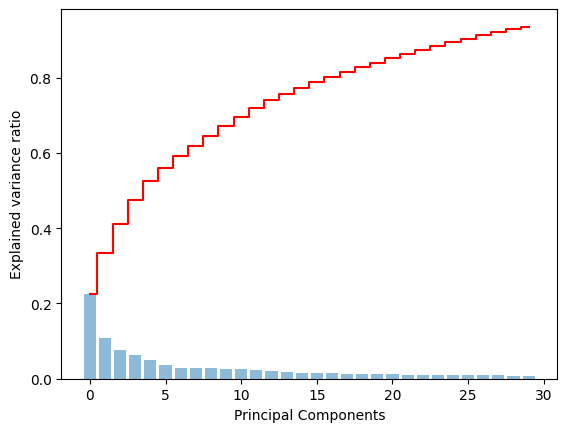

In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.bar(range(0,len(fit_pca.explained_variance_ratio_)), fit_pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(0,len(fit_pca.explained_variance_ratio_)), np.cumsum(fit_pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

In [ ]:
print('explained_variance_ratio :.{}%'.format(fit_pca.explained_variance_ratio_[0:10].sum()*100))

explained_variance_ratio :.67.18620341757972%


In [ ]:
# por conveniencia castea la data en un DataFrame
X_transformed_pca = pd.DataFrame(X_pca)
X_transformed_pca = X_transformed_pca[[0, 1, 2]]
X_transformed_pca.columns = ['PC0', 'PC1', 'PC2']  #X_transformed_pca.rename(columns={0:'PC0',1:'PC1',2:'PC2'})
df_new = pd.merge(X_transformed_pca, y,left_index=True, right_index=True)
df_new

,PC0,PC1,PC2,cluster_std
0,0.005820,2.167558,2.535884,1
1,4.234164,0.846991,2.370276,1
2,-0.011326,0.556293,1.046679,1
3,2.346563,10.318345,0.541685,1
4,-0.564655,-0.190385,0.554158,1
...,...,...,...,...
13096,12.759698,7.809432,2.837371,2
13097,-1.036676,3.231928,-4.526514,2
13098,2.005052,7.826163,-4.700131,2
13099,4.195070,5.195834,-3.521659,2


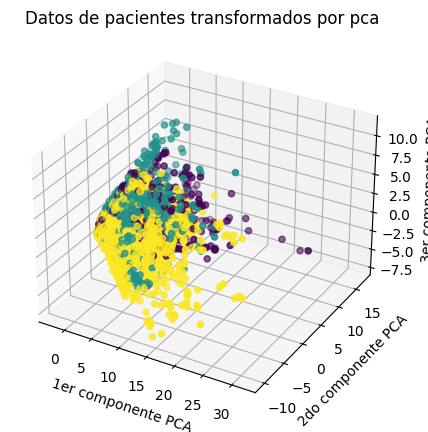

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


# realiza un scatter plot con las 3 primeras componentes PCA
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(projection='3d')
ax.scatter(df_new['PC0'], df_new['PC1'], df_new['PC2'],c=df_new['cluster_std'])
ax.set_xlabel('1er componente PCA')
ax.set_ylabel('2do componente PCA')
ax.set_zlabel('3er componente PCA')
plt.title('Datos de pacientes transformados por pca')
plt.show()

In [ ]:
import plotly.express as px
import plotly.express.colors
# Visualizamos en 3D

figure = px.scatter_3d(df_new, x='PC0', y='PC1', z='PC2',
                       color='cluster_std',  size_max=5,opacity=0.7,
                       #symbol = 'diagnostico',
                       #size = 'diagnostico',
                       width=500, height=500)
# Ajusta los márgenes si es necesario
figure.update_layout(margin=dict(l=0, r=0, b=0, t=0))

figure.show()

### **TSNE**

In [ ]:
# 1. Importar la función MinMaxScaler de la librería Sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 2. Se extrae los atributos de DF

# 3. Define el operador del escalamiento
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_fit=scaler.fit(X)            # Ajusta el escalador (aprende el min-max)  -> Guardo el escaler para utilizarlo en mi data de ENTRENAMIENTO y luego para reescalar para mi TEST
rescaledX = scaler_fit.transform(X) # realiza el escalado, transformando X. El resultado es un array numpy

# 4. Pasamos el array de los atributos rescalados a un Dataframe
data_rescaled = pd.DataFrame(rescaledX, columns=X.columns)

data_rescaled.head()

,DOMINIO,ESTRATO,Registro_SUNARP_SI,Registro_SUNARP_NO,Asistencia_Tecnica_SI,Asistencia_Tecnica_NO,Asistencia_Tecnica_NOSABE,Licencia_SI,Licencia_NO,Licencia_NOSABE,...,Conteo_sismos,Promedio,Min_Mag,Max_Mag,Categoria_I-1,Categoria_I-2,Categoria_I-3,Categoria_I-4,Proyectos_inversion,ZONA
0,0.857143,0.857143,0.000000,0.000000,0.000000,0.067227,0.000000,0.000000,0.068966,0.000000,...,0.00,0.000000,0.000000,0.000000,0.325,0.130435,0.375,0.0,0.0,0.333333
1,0.857143,0.428571,0.049242,0.120000,0.029703,0.126050,0.095238,0.066351,0.109195,0.089431,...,0.00,0.000000,0.000000,0.000000,0.175,0.000000,0.250,0.0,0.0,0.333333
2,0.857143,0.714286,0.007576,0.040000,0.000000,0.058824,0.015873,0.000000,0.060345,0.016260,...,0.00,0.000000,0.000000,0.000000,0.100,0.043478,0.125,0.0,0.0,0.333333
3,0.857143,0.857143,0.003788,0.000000,0.000000,0.100840,0.007937,0.000000,0.103448,0.008130,...,0.02,0.680556,0.680556,0.644737,0.725,0.217391,0.625,0.0,0.0,0.333333
4,0.857143,0.714286,0.007576,0.053333,0.000000,0.047619,0.007937,0.004739,0.048851,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.0,0.0,0.333333


In [ ]:
# Importa las bibliotecas necesarias
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
#Función de reduccion de dimensionalidad
# T = 1 -> LDA
# T = 2 -> TSNE

def reduccion_dimen(X,y,n,T):
  columns=[]
  for i in range (n):
    columns.append("PC"+str(i+1))

  if T==1:
    lda = LinearDiscriminantAnalysis(n_components=n)  # n_components es el número de componentes discriminante
    X_lda = lda.fit_transform(X, y)
    X_LDA = pd.DataFrame(X_lda, columns = columns)
    X_LDA['cluster_std'] = y
    return X_LDA
  else:
    tsne = TSNE(n_components=, perplexity=70, learning_rate=1000,n_iter=1000)
    data_tsne = tsne.fit_transform(X)
    X_TSNE = pd.DataFrame(data_tsne, columns = columns)
    X_TSNE['cluster_std'] = y
    return X_TSNE

In [ ]:
# Función de reducción de dimensiones con LDA
reduccion_dimen(X,y,2,1)

,PC1,PC2,cluster_std
0,-0.596328,-0.578254,1
1,-2.041029,-0.071043,1
2,-1.163325,-0.146790,1
3,-1.641591,-0.391931,1
4,-1.112554,-0.069443,1
...,...,...,...
13339,2.255618,4.459932,0
13340,-0.341873,-0.143453,0
13341,1.348768,2.530379,0
13342,-1.198628,1.900675,0


In [ ]:
# Función de reducción de dimensiones con TSNE
Data_TSNE=reduccion_dimen(X,y,2,2)

In [ ]:
def graficoTSNE(df,std,target):
  y = np.array(df.cluster_std)
  X = np.array(df.drop(columns =[target]))
  etiquetas = np.array(df[target].value_counts().index)
  plt.figure()
  colors = ['navy', 'turquoise', 'darkorange',"green","red"]
  for color, i, target_name in zip(colors, [1, 2, 3], etiquetas):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=.8, color=color,
                label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title('TSNE del dataset Clientes')
  plt.show()

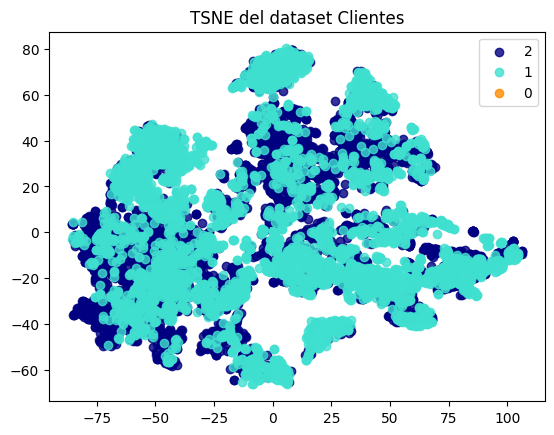

In [ ]:
graficoTSNE(Data_TSNE,y,"cluster_std")

### **LDA**

In [ ]:
def grafico(df,target):
  y = np.array(df.cluster_std)
  X = np.array(df.drop(columns =[target]))
  etiquetas = np.array(df[target].value_counts().index)
  plt.figure()
  colors = ['navy', 'turquoise', 'darkorange',"green","red"]
  for color, i, target_name in zip(colors, [1, 2, 3], etiquetas):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=.8, color=color,
                label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title('LDA del dataset Clientes')
  plt.show()

In [ ]:
df_LDA = reduccion_dimen(X,y,2,1)
df_LDA

,PC1,PC2,cluster_std
0,-0.596328,-0.578254,1
1,-2.041029,-0.071043,1
2,-1.163325,-0.146790,1
3,-1.641591,-0.391931,1
4,-1.112554,-0.069443,1
...,...,...,...
13339,2.255618,4.459932,0
13340,-0.341873,-0.143453,0
13341,1.348768,2.530379,0
13342,-1.198628,1.900675,0


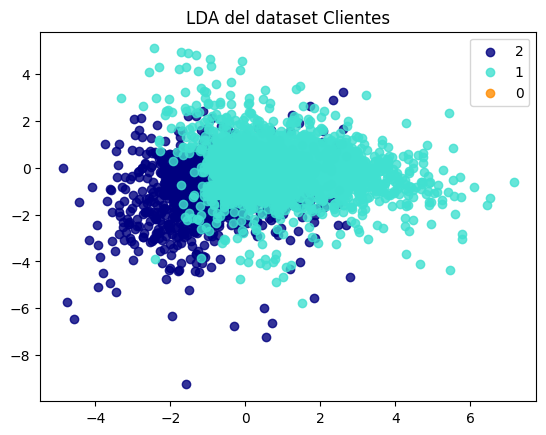

In [ ]:
grafico(df_LDA,"cluster_std")